In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import joblib

portion_all = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/portion_all.pkl')
print(len(portion_all[0]))
portion = portion_all[0]
portion = np.array(portion)
print(portion)
max = portion.max()
min = portion.min()
print(max,min)

5000
[0.11834305 0.11369309 0.11336481 ... 0.11006779 0.11374387 0.12292136]
0.12420883880048905 0.10980988315505313


In [ ]:
#计算p1
import joblib
import numpy as np
T = joblib.load("./cifar-10-100n-main-final/features_worst_subset2000/Noise_T.pkl")
print(T)


[[124.  14.   2.   9.   7.   6.   8.   6.  17.  12.]
 [ 12. 124.   8.  13.   9.   4.   9.   2.  13.  59.]
 [ 12.   2. 141.  14.  12.  14.  17.   1.   6.   5.]
 [  6.   4.   9. 103.   7.  41.  13.   5.   4.   5.]
 [  9.   3.  12.  10. 108.   7.   9.  19.   5.   4.]
 [  6.   6.  11.  32.  17. 112.  13.   5.   5.   6.]
 [  5.   1.   5.   7.   8.   4. 123.   3.   2.   2.]
 [  4.   2.   9.   2.  27.   8.   5. 152.   7.   4.]
 [ 15.   2.   3.   6.   2.   1.   2.   4. 134.   5.]
 [  7.  42.   0.   4.   3.   3.   1.   3.   7.  98.]]


[ 69.11962367  74.91098298  81.18758572  87.9900892   95.36255733
 103.35274601 112.01241249]
[ 11.43047899  16.9412244   25.10875392  37.21392907  55.15512723
  81.74595201 121.15647276]
[ 44.38904104  55.34001653  68.9926468   86.01344218 107.23334412
 133.68829104 166.669792  ]
[ 63.52935912  70.47884097  78.18852721  86.74157667  96.23024492
 106.75687937 118.43502323]
[ 33.40682434  45.2728023   61.35353085  83.14607351 112.6792451
 152.7024878  206.94183529]
[ 58.95544344  66.5145362   75.04283349  84.66460386  95.52004919
 107.76734765 121.58495853]
[ 60.99062925  67.95596369  75.7167627   84.36387098  93.99850803
 104.73345295 116.69436459]
[ 41.77552288  52.45818451  65.87257161  82.71722956 103.86933284
 130.43036333 163.78346923]
[ 50.09287197  59.49386047  70.65914359  83.9198286   99.66916203
 118.3741915  140.58961595]
[ 44.87298135  54.30475585  65.71897875  79.53233746  96.2491022
 116.47953486 140.96216725]


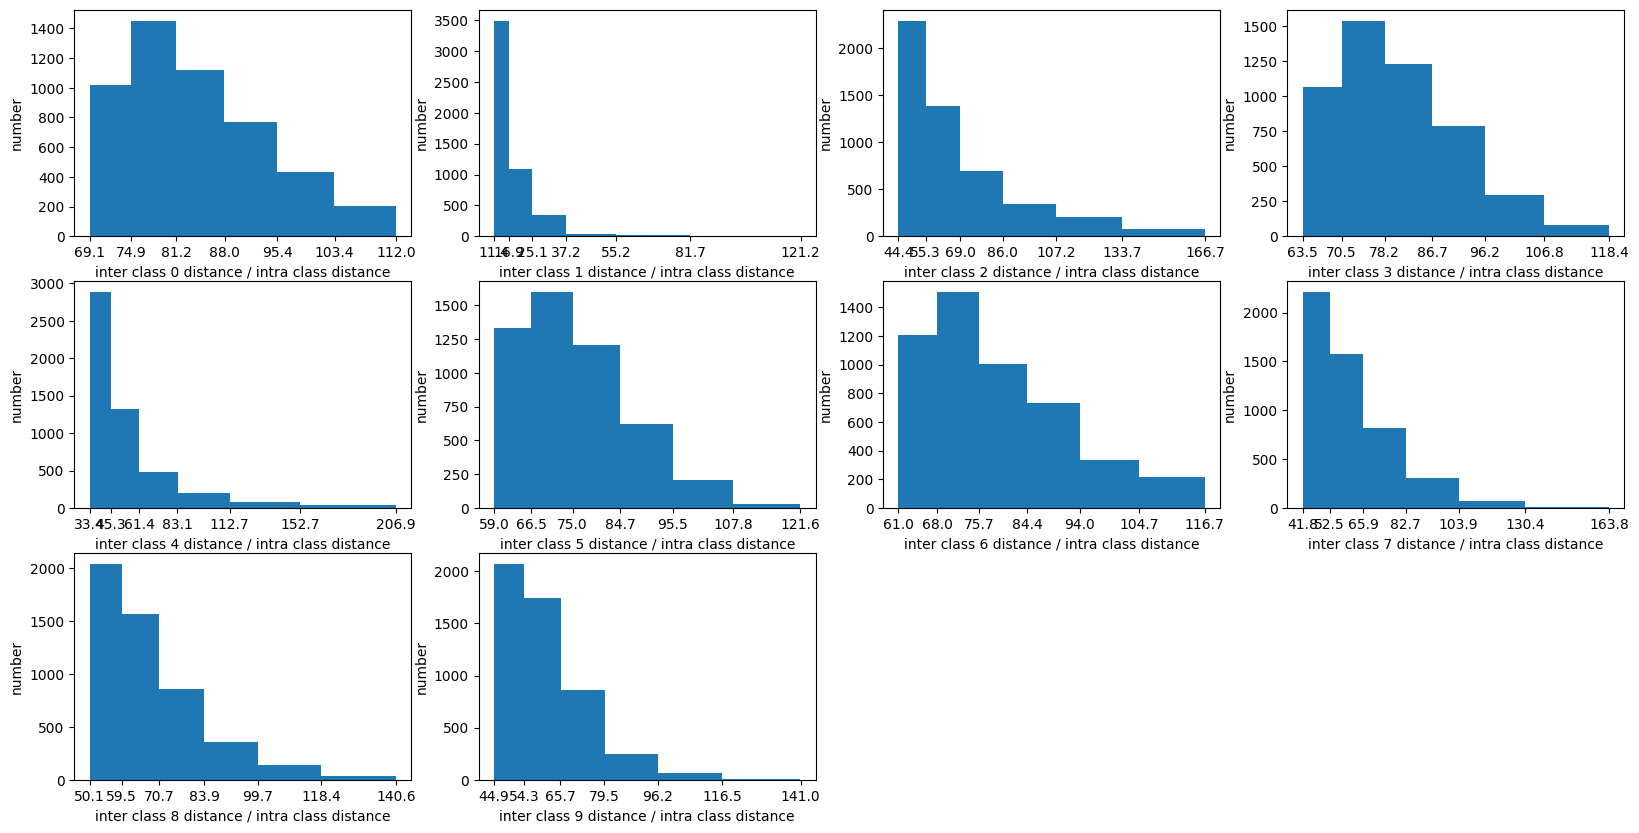

In [ ]:
#fullset特征分布统计
import numpy as np
import matplotlib.pyplot as plt
import joblib
import math

portion_all = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/portion_all_599ep.pkl')
plt.figure(figsize=(20, 10))
n_list = [[] for i in range(10)]
b_list = [[] for i in range(10)]
data_list = [[] for i in range(10)]
portion_all_1000 = [[] for i in range(10)]
for i in range(10):
    plt.subplot(3,4,1+i)
    portion = portion_all[i]
    portion = np.array(portion)
    max = portion.max()
    min = portion.min()
    aa = []
    portion_all_1000[i] = [ii*1000 for ii in portion_all[i]]
    aa.append(portion_all_1000[i])

    log_max = math.log(max*1000, 10)
    log_min = math.log(min*1000, 10)
    bins = np.logspace(log_min, log_max, num=7, base=10)
    #print(bins)
    
    n_list[i], b_list[i], data_list[i] = plt.hist(aa,bins=bins)
    print(b_list[i])
    #plt.hist(distance_noisy3to5, color = 'r')
    plt.xlabel('inter class '+str(i)+' distance '+'/'+' intra class distance')
    plt.ylabel('number')
    x_bins = [round(b,1) for b in bins]
    plt.xticks(x_bins)
plt.show()

In [74]:
portion_all_1000 = np.array(portion_all_1000)
print(portion_all_1000.shape)

(10, 5000)


In [76]:
n_list_arr = np.array(n_list)

In [ ]:
#subset噪声矩阵输入，获取每一类中噪声样本数量与噪声比例，获取p1
T = joblib.load('./cifar-10-100n-main-final/features_worst_subset2000/Noise_T.pkl')
print(T)
T_sum = np.sum(T,axis=0)
print(T_sum)
n_rate_list = []
n_noisenum_list = []
flip_list = [[] for ii in range(10)]

for i in range(0,10):
    n_rate = (T_sum[i]-T[i,i])/T_sum[i]
    n_rate_list.append(n_rate)
    n_noisenum = T_sum[i]-T[i,i]
    n_noisenum_list.append(n_noisenum)
    for k in range(10):
        if k != i :
            flip_prob = T[k,i]/(T_sum[i]-T[i,i])
            flip_list[i].append(flip_prob)
print(n_rate_list)
n_rate_array = np.array(n_rate_list)
n_rate_portion = n_rate_array/np.sum(n_rate_array)
n_rate_portion = n_rate_portion.tolist()
print(n_rate_portion)
print(n_noisenum_list)
n_array = np.array(n_noisenum_list)
n_noise_portion = n_array/np.sum(n_array)
n_noise_portion = n_noise_portion.tolist()
print(n_noise_portion)
print(flip_list)#p1
p1_list = flip_list


[[124.  14.   2.   9.   7.   6.   8.   6.  17.  12.]
 [ 12. 124.   8.  13.   9.   4.   9.   2.  13.  59.]
 [ 12.   2. 141.  14.  12.  14.  17.   1.   6.   5.]
 [  6.   4.   9. 103.   7.  41.  13.   5.   4.   5.]
 [  9.   3.  12.  10. 108.   7.   9.  19.   5.   4.]
 [  6.   6.  11.  32.  17. 112.  13.   5.   5.   6.]
 [  5.   1.   5.   7.   8.   4. 123.   3.   2.   2.]
 [  4.   2.   9.   2.  27.   8.   5. 152.   7.   4.]
 [ 15.   2.   3.   6.   2.   1.   2.   4. 134.   5.]
 [  7.  42.   0.   4.   3.   3.   1.   3.   7.  98.]]
[200. 200. 200. 200. 200. 200. 200. 200. 200. 200.]
[0.38, 0.38, 0.295, 0.485, 0.46, 0.44, 0.385, 0.24, 0.33, 0.51]
[0.09731113956466068, 0.09731113956466068, 0.07554417413572342, 0.12419974391805376, 0.11779769526248399, 0.11267605633802816, 0.09859154929577464, 0.0614596670934699, 0.08450704225352113, 0.13060179257362356]
[76.0, 76.0, 59.0, 97.0, 92.0, 88.0, 77.0, 48.0, 66.0, 102.0]
[0.0973111395646607, 0.0973111395646607, 0.07554417413572344, 0.12419974391805377

In [78]:
#获取fullset每一类中噪声样本数量
eachclass_noise_num = []
nr = 0.4
fullset_num = 50000
noise_num_all = nr*fullset_num
for i in range(0,10):
    num = noise_num_all*n_noise_portion[i]
    #num = noise_num_all*n_rate_portion[i]
    eachclass_noise_num.append(num)

In [ ]:
"""#原方案
rate_list = joblib.load('./cifar-10-100n-main/features_clean_full/subset_eachclass_gaprate.pkl')
n_list_arr = np.array(n_list)
rate_list_arr = np.array(rate_list)
#print(n_list_arr)
#print(rate_list_arr)
gap_noise_num = np.multiply(n_list_arr,rate_list_arr)
gap_noise_num = np.round(gap_noise_num)
"""

#获取subset每一类中，每个区间噪声样本数占此类总噪声样本数的比例
subset_noisenum_list = joblib.load('./cifar-10-100n-main-final/features_worst_subset2000/subset_eachclass_gap_noisenum.pkl')
subset_noisenum_list_arr = np.array(subset_noisenum_list)
subset_eachclass_gap_T_rate_list = []
for i in range(0,10):
    #print(subset_noisenum_list_arr[i])
    #print(n_noisenum_list[i])
    gapnoise_T_rate = subset_noisenum_list_arr[i]/n_noisenum_list[i]
    subset_eachclass_gap_T_rate_list.append(gapnoise_T_rate)
print(subset_eachclass_gap_T_rate_list)
"""#方案2
subset_noiserate = joblib.load("./cifar-10-100n-main-final/features_worst_subset2000/subset_eachclass_gaprate.pkl")
subset_noiserate = np.array(subset_noiserate)
subset_noiserate_portion = [[] for ii in range(10)]
for i in range(0,10):
    subset_noiserate_portion[i] = subset_noiserate[i]/np.sum(subset_noiserate[i])
print(subset_noiserate_portion)
"""

[array([0.07894737, 0.15789474, 0.10526316, 0.13157895, 0.19736842,
       0.32894737]), array([0.        , 0.01315789, 0.21052632, 0.38157895, 0.27631579,
       0.10526316]), array([0.01694915, 0.        , 0.13559322, 0.3220339 , 0.28813559,
       0.22033898]), array([0.04123711, 0.31958763, 0.21649485, 0.16494845, 0.09278351,
       0.15463918]), array([0.        , 0.11956522, 0.29347826, 0.23913043, 0.15217391,
       0.18478261]), array([0.03409091, 0.34090909, 0.27272727, 0.11363636, 0.09090909,
       0.14772727]), array([0.        , 0.01298701, 0.28571429, 0.33766234, 0.19480519,
       0.16883117]), array([0.        , 0.0625    , 0.08333333, 0.33333333, 0.375     ,
       0.125     ]), array([0.15151515, 0.10606061, 0.16666667, 0.06060606, 0.27272727,
       0.22727273]), array([0.        , 0.08823529, 0.32352941, 0.2745098 , 0.25490196,
       0.05882353])]


'#方案2\nsubset_noiserate = joblib.load("/home/user/limengting/cifar-10-100n-main-final/features_worst_subset2000/subset_eachclass_gaprate.pkl")\nsubset_noiserate = np.array(subset_noiserate)\nsubset_noiserate_portion = [[] for ii in range(10)]\nfor i in range(0,10):\n    subset_noiserate_portion[i] = subset_noiserate[i]/np.sum(subset_noiserate[i])\nprint(subset_noiserate_portion)\n'

In [80]:
print(eachclass_noise_num)

[1946.222791293214, 1946.222791293214, 1510.8834827144688, 2483.9948783610753, 2355.95390524968, 2253.521126760563, 1971.8309859154929, 1229.1933418693982, 1690.1408450704225, 2612.035851472471]


In [81]:
subset_eachclass_gap_T_rate_arr = np.array(subset_eachclass_gap_T_rate_list)
eachclass_noise_num_arr = np.array(eachclass_noise_num)

In [82]:
print(eachclass_noise_num_arr)
print(subset_eachclass_gap_T_rate_arr)
eachclass_noise_num_ex = np.expand_dims(eachclass_noise_num_arr,axis=1)
gap_noise_num =  np.multiply(eachclass_noise_num_ex,subset_eachclass_gap_T_rate_arr)
gap_noise_num = np.round(gap_noise_num)
print(gap_noise_num)

[1946.22279129 1946.22279129 1510.88348271 2483.99487836 2355.95390525
 2253.52112676 1971.83098592 1229.19334187 1690.14084507 2612.03585147]
[[0.07894737 0.15789474 0.10526316 0.13157895 0.19736842 0.32894737]
 [0.         0.01315789 0.21052632 0.38157895 0.27631579 0.10526316]
 [0.01694915 0.         0.13559322 0.3220339  0.28813559 0.22033898]
 [0.04123711 0.31958763 0.21649485 0.16494845 0.09278351 0.15463918]
 [0.         0.11956522 0.29347826 0.23913043 0.15217391 0.18478261]
 [0.03409091 0.34090909 0.27272727 0.11363636 0.09090909 0.14772727]
 [0.         0.01298701 0.28571429 0.33766234 0.19480519 0.16883117]
 [0.         0.0625     0.08333333 0.33333333 0.375      0.125     ]
 [0.15151515 0.10606061 0.16666667 0.06060606 0.27272727 0.22727273]
 [0.         0.08823529 0.32352941 0.2745098  0.25490196 0.05882353]]
[[154. 307. 205. 256. 384. 640.]
 [  0.  26. 410. 743. 538. 205.]
 [ 26.   0. 205. 487. 435. 333.]
 [102. 794. 538. 410. 230. 384.]
 [  0. 282. 691. 563. 359. 435.]
 

In [40]:
print(sum(gap_noise_num))

[ 615. 2689. 4456. 4610. 4123. 3355.]


In [83]:
#筛选每个区间内噪声样本index，对应portion_all_1000(idx_each_class)的位置
import matplotlib
#print(b_list)
#print(n_list)
ind_eachclass_noisy_list = [[] for i in range(10)]
for i in range(10):
    for j in range(6):
        #print(b_list[i][j])
        #print(b_list[i][j+1])
        ind_eachclass = np.argwhere((portion_all_1000[i]>=b_list[i][j])&(portion_all_1000[i]<b_list[i][j+1]))
        ind_eachclass = ind_eachclass.squeeze()
        
        #print(ind_eachclass)
        if (len(ind_eachclass)>=int(gap_noise_num[i][j])):
            ind_eachclass_noisy = np.random.choice(ind_eachclass,int(gap_noise_num[i][j]),replace=False)
        if (len(ind_eachclass)<int(gap_noise_num[i][j])):
            ind_eachclass_noisy = np.random.choice(ind_eachclass,len(ind_eachclass),replace=False)
        print(ind_eachclass_noisy)
        #print(ind_eachclass_noisy)
        ind_eachclass_noisy_list[i].extend(ind_eachclass_noisy.tolist())
        #print(ind_eachclass_noisy.shape)
#print(len(ind_eachclass_noisy_list))



[4202 2667 3330  609 3072 4023 3868  316 4420 4762 4273   74 4853 3670
 3238  778 2140 3593 3781 3312 4902 1978 4002 3880 4479 4061 3419 3919
  660 2037  453 3396 2341 1008  745  181 3107 1179 2699 1257 3054 4037
 1391 1717 2890 3429 3746 3009 1199  123 3400 2455 2344  966  150 2356
 4354 1181 1061 3372 3019 4095 2300  199 4462 3655 1411 3794 2595 1768
  606 1906 3606 2116 1365 3647 1498 2712 4832 4630 3209 3405 3855 4028
 1701 3550 2993 3302 2878 1481 4112 3131 3609 3114 3457 2367 2135 2416
  442 2672 3939 4428 1129 3447 1115  397 3814 1763 2385  833 3682 3492
 2706  357 1499 3571 4438  999 2988  738 3728 1656 4573 1098  173 2894
   15 4546 3637 3619  596 3733  548 3301 1830 3200 3876  519 2111 1208
  779 3172  226 4196  997 4171 1612  193  249 3082 4388  582 2979 1095]
[2131 3273 4251 1605 1604 3303 1662  479 2365   61 3608 3155 2490 2224
 1934 1775  190 4413 3753   96 1699 4409 3771 2114 3134 1742  127 2598
 3332 2199 2664 2071 3517 2251  990 3885 2057 1417 4777 3066 1720  987
 1488

In [84]:
print(np.unique(np.array(ind_eachclass_noisy_list[0])).shape)

(1512,)


In [13]:
for i in range(10):
    print(len(ind_eachclass_noisy_list[i]))

1946
1922
1486
2458
2330
2254
1972
1204
1664
2612


In [ ]:
#对应ind.pkl（gd.pkl）的位置
idx_each_class = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/idx_each_class_599ep.pkl')
ind = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/ind599.pkl')
true_idx = [[] for i in range(10)]
for i in range(10):
    true_idx[i] = idx_each_class[i][ind_eachclass_noisy_list[i]]
#true_idx = np.array(true_idx)
#true_idx = true_idx.flatten()
#noisy_idx_original = ind[true_idx]


In [14]:
print(np.unique(idx_each_class).shape)

(50000,)


In [ ]:
#找到对应gd.pkl位置的原标签以及其对应的最原始列表中位置
gd = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/gd599.pkl')
print(gd)
#print(true_idx)
true_idx_list = [idd.tolist() for idd in true_idx]
true_idx_f = sum(true_idx_list,[])
true_idx_f = np.array(true_idx_f)
print(true_idx_f.shape)
label_before = gd[true_idx_f]
print(label_before)
noisy_idx_original = ind[true_idx_f]
print(noisy_idx_original)


[0 7 6 ... 6 4 4]
(12745,)
[0 0 0 ... 9 9 9]
[45525 14069 11008 ...  7892  8493 16533]


In [17]:
print(np.unique(true_idx_f).shape)

(12745,)


In [18]:
print(noisy_idx_original.shape)
print((np.unique(noisy_idx_original)).shape)

(12745,)
(12745,)


In [ ]:
clean_label = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/clean_labels.pkl')
clean_label = np.array(clean_label)
label_before_original = clean_label[noisy_idx_original]
print((label_before_original==label_before).all())

True


In [ ]:
intra_all_list0 = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset/portion_each_list.pkl')
intra_all_list1 = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset/intra_all_list.pkl')
#print(intra_all_list0)
print(intra_all_list0[1].shape)

(5000, 9)


In [ ]:
intra_all_list = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/portion_each_list_599ep.pkl')
label_after_list = [[] for i in range(10)]
p2_list = [[] for i in range(10)]
#print(intra_all_list)
for i in range(10):
    noisy_intra = intra_all_list[i][ind_eachclass_noisy_list[i]]
    ni_sum = np.sum(noisy_intra, axis=1)
    ni_sum = np.expand_dims(ni_sum,axis=1)
    noisy_intra_norm = noisy_intra/ni_sum
    print(noisy_intra_norm)
    p2_list[i] = noisy_intra_norm
    """
    label_after = np.argmax(noisy_intra,axis=1)
    print(label_after)
    label_after = np.select([label_after>=i],[label_after+1],[label_after])
    print(label_after[0])
    label_after_list.append(label_after[0].tolist())##需要修正一下小细节，用np.select(l>=i,l+1)
label_after_list = sum(label_after_list,[])
#print(label_after_list)
#print(intra_all_list.shape)
"""

[[0.07481208 0.09917957 0.14100025 ... 0.09142732 0.13237179 0.1150607 ]
 [0.05957077 0.12378614 0.15014013 ... 0.13743691 0.09692602 0.09388995]
 [0.064986   0.13415672 0.14553392 ... 0.0973095  0.12277493 0.09119083]
 ...
 [0.29905142 0.06365262 0.08335598 ... 0.06291943 0.12082816 0.12810604]
 [0.34718068 0.06162168 0.07796626 ... 0.06387248 0.10585872 0.11774318]
 [0.28363294 0.06155496 0.08813387 ... 0.07068202 0.0960538  0.1604822 ]]
[[0.11183277 0.08162756 0.10607018 ... 0.09176607 0.12650501 0.17585703]
 [0.11290434 0.08271254 0.10513298 ... 0.08416524 0.14595733 0.16235705]
 [0.11182529 0.08108697 0.10760203 ... 0.09309324 0.12237736 0.180859  ]
 ...
 [0.10969608 0.06860269 0.11616193 ... 0.08542517 0.09800499 0.22437026]
 [0.11331309 0.07007289 0.12189687 ... 0.07996283 0.1037554  0.20101174]
 [0.1130015  0.06986117 0.11360693 ... 0.07685062 0.11560297 0.20305073]]
[[0.14077643 0.06869564 0.11984744 ... 0.11621045 0.12513446 0.08412067]
 [0.14759736 0.0638332  0.12342837 ... 

In [112]:
#p = p1*0.3 + p2*0.7
p1_array = np.array(p1_list)
label_after_final = [[] for i in range(10)]
for i in range(10):
    prob_new = p2_list[i]*0.9 + p1_array[i]*0.1
    prob_new_sum = np.sum(prob_new,axis=1)
    prob_new_sum = np.expand_dims(prob_new_sum,axis=1)
    prob_new = prob_new/prob_new_sum
    label_after_new = np.argmax(prob_new,axis=1)
    print(label_after_new)
    label_after_new = np.select([label_after_new>=i],[label_after_new+1],[label_after_new])
    print(label_after_new[0])
    label_after_final.append(label_after_new[0].tolist())
label_after_final = sum(label_after_final,[])

[7 2 4 ... 0 0 0]
[8 3 5 ... 1 1 1]
[8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 7 8 8 7 8 8 8]
[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9
 9 9

In [21]:
print(label_after_arr.shape)

(19848,)


In [ ]:
#
label_after_arr = np.array(label_after_final)
clean_label = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/clean_labels.pkl')
clean_label = np.array(clean_label)
print(clean_label.shape)
print(sum(clean_label[noisy_idx_original] != label_after_arr))
#print(noisy_idx_original.shape)
#print(clean_label[noisy_idx_original])
#print(label_after_arr)


(50000,)
12745


In [114]:
clean_label[noisy_idx_original] = label_after_arr

In [58]:
print(sum(clean_label[noisy_idx_original] != label_after_arr))

0


In [ ]:
cc_label = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/clean_labels.pkl')
cc_label = np.array(cc_label)
print(sum(clean_label[noisy_idx_original]!= cc_label[noisy_idx_original]))
print(sum(clean_label!= cc_label))
print(clean_label[noisy_idx_original])
print(cc_label[noisy_idx_original])

12745
12745
[8 2 8 ... 1 1 1]
[0 0 0 ... 9 9 9]


In [65]:
print((noisy_idx_original > 50000).all())
print(clean_label.shape)
print(cc_label.shape)
print(noisy_idx_original.shape)
print(sum(clean_label[noisy_idx_original] != cc_label[noisy_idx_original]))
print(sum(clean_label!= cc_label))

False
(50000,)
(50000,)
(19848,)
19848
10261


In [ ]:
joblib.dump(clean_label,'./cifar-10-100n-main-final/features_pre_clean_fullset600ep/91_change_labels_new3_599ep.pkl')

['/home/user/limengting/cifar-10-100n-main-final/features_pre_clean_fullset600ep/91_change_labels_new3_599ep.pkl']

In [ ]:
import json
change = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/change_labels_new3_599ep.pkl')
with open("./cifar-10-100n-main-final/features_pre_clean_fullset600ep/change_labels_new3_599ep.json","w") as f:
    json.dump(change.tolist(),f)
#print(change.tolist())

In [ ]:
gd_original = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/gd599.pkl')
gd_original[true_idx_f] = label_after_arr
joblib.dump(gd_original,'./cifar-10-100n-main-final/features_pre_clean_fullset600ep/91_gd2noisy_599ep_new3.pkl')

['/home/user/limengting/cifar-10-100n-main-final/features_pre_clean_fullset600ep/91_gd2noisy_599ep_new3.pkl']

In [ ]:
import joblib
import pandas as pd
import numpy as np
ind = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/ind199.pkl')
gd = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/gd199.pkl')
IDN = list(pd.read_csv('./IDN-master/data/CIFAR10/label_noisy/dependent0.4.csv')['label_noisy'].values.astype(int))
IDN = np.array(IDN)
gd_IDN = IDN[ind]
print(gd_IDN)
joblib.dump(gd_IDN,'./cifar-10-100n-main-final/features_pre_clean_fullset600ep/gd2IDN_199ep.pkl')

[8 7 4 ... 6 4 7]


['/home/user/limengting/cifar-10-100n-main-final/features_pre_clean_fullset600ep/gd2IDN_599ep.pkl']

In [ ]:
import random
import json
noise_label = []
clean_labels = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/clean_labels.pkl')
idx = list(range(50000))
random.shuffle(idx)
r = 0.4
num_noise = int(r * 50000)
noise_idx = idx[:num_noise]
for i in range(50000):
    if i in noise_idx:
        noiselabel = random.randint(0, 9)
        noise_label.append(noiselabel)
    else:
        noise_label.append(clean_labels[i])
print(f"injecting noisy labels finished")
#print(noise_label)
with open("./cifar-10-100n-main-final/features_pre_clean_fullset600ep/40sym.json","w") as f:
    json.dump(noise_label,f)

NameError: name 'joblib' is not defined

In [ ]:
import joblib
import pandas as pd
import numpy as np
ind = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/ind599.pkl')
gd = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/gd599.pkl')
with open("./cifar-10-100n-main-final/features_pre_clean_fullset600ep/40sym.json","r") as f:
    sym = json.load(f)
sym = np.array(sym)
gd_sym = sym[ind]
print(gd_sym)
joblib.dump(gd_sym,'./cifar-10-100n-main-final/features_pre_clean_fullset600ep/gd2sym_599ep.pkl')

[0 7 0 ... 6 4 4]


['/home/user/limengting/cifar-10-100n-main-final/features_pre_clean_fullset600ep/gd2sym_599ep.pkl']

In [ ]:
import joblib
clean_label = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/clean_labels.pkl')
noisy_label = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/change_labels_new2_599ep_2.pkl')
print(sum(clean_label==noisy_label))

39772


In [ ]:
import joblib
import torch
import pandas as pd
import numpy as np
ind = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/ind299.pkl')
gd = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/gd299.pkl')
noise_file = torch.load('./cifar-10-100n-main-final/data/CIFAR-10_human.pt')
worst_label = noise_file['worse_label']
clean_label = noise_file['clean_label']
gdd = clean_label[ind]
print((gd==gdd).all())
gd_worst = worst_label[ind]
print(gd_worst)
joblib.dump(gd_worst,'./cifar-10-100n-main-final/features_pre_clean_fullset600ep/gd2worst_299ep.pkl')

True
[3 5 0 ... 3 4 0]


['/home/user/limengting/cifar-10-100n-main-final/features_pre_clean_fullset600ep/gd2worst_299ep.pkl']

In [ ]:
import torch
import joblib 
import numpy as np
noise_file = torch.load('./cifar-10-100n-main-final/data/CIFAR-10_human.pt')
worst_label = noise_file['worse_label']
clean_labels = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/clean_labels.pkl')

feature = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/feats599.pkl')
gd = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/gd599.pkl')
ind = joblib.load('./cifar-10-100n-main-final/features_pre_clean_fullset600ep/ind599.pkl')
targ = worst_label[ind]
new_gd = []
new_targ = []
new_ind = []
new_feat = []
for the_class in range(10):
                idx = np.where(gd == the_class)[0]
                print(idx)
                #np.random.seed(1234)
                np.random.shuffle(idx)
                selec_idx = idx[:1000]
                new_gd.extend(gd[selec_idx].tolist())
                new_targ.extend(targ[selec_idx].tolist())
                new_ind.extend(ind[selec_idx].tolist())
                new_feat.extend(feature[selec_idx].tolist())



[    0    14    30 ... 49987 49988 49995]
[   11    13    32 ... 49927 49931 49977]
[    3     4     9 ... 49967 49974 49994]
[   10    12    21 ... 49983 49991 49992]
[   38    39    40 ... 49985 49998 49999]
[   19    23    26 ... 49965 49989 49990]
[    2     5    15 ... 49969 49972 49997]
[    1     7    16 ... 49975 49979 49996]
[    6     8    20 ... 49976 49981 49993]
[   28    33    35 ... 49952 49964 49984]


In [34]:
new_feat = np.array(new_feat)
new_targ = np.array(new_targ)
new_gd = np.array(new_gd)
new_ind = np.array(new_ind)

In [ ]:
joblib.dump(new_gd,'./cifar-10-100n-main-final/features_pre_clean_fullset600ep/worst10000_gd_599ep.pkl')
joblib.dump(new_targ,'./cifar-10-100n-main-final/features_pre_clean_fullset600ep/worst10000_targ_599ep.pkl')
joblib.dump(new_feat,'./cifar-10-100n-main-final/features_pre_clean_fullset600ep/worst10000_feat_599ep.pkl')
joblib.dump(new_ind,'./cifar-10-100n-main-final/features_pre_clean_fullset600ep/worst10000_ind_599ep.pkl')

['/home/user/limengting/cifar-10-100n-main-final/features_pre_clean_fullset600ep/worst10000_ind_599ep.pkl']

In [ ]:
rate_list = joblib.load('./cifar-10-100n-main/features_clean_full/subset_eachclass_gaprate.pkl')
print(rate_list)

[[0.0, 0.07861635220125786, 0.4392523364485981, 0.8679245283018868, 0.9456521739130435, 0.95], [0.24285714285714285, 0.3008356545961003, 0.4232081911262799, 0.6328125, 0.859375, 1.0], [0.011363636363636364, 0.03571428571428571, 0.3557692307692308, 0.79375, 0.975, 1.0], [0.015748031496062992, 0.16300940438871472, 0.5916666666666667, 0.9193548387096774, 0.990990990990991, 1.0], [0.047619047619047616, 0.19666666666666666, 0.62109375, 0.9230769230769231, 0.9791666666666666, 1.0], [0.05263157894736842, 0.15432098765432098, 0.5436507936507936, 0.864516129032258, 0.9634146341463414, 1.0], [0.011428571428571429, 0.13095238095238096, 0.5545851528384279, 0.9294871794871795, 0.9390243902439024, 1.0], [0.005434782608695652, 0.023316062176165803, 0.2985781990521327, 0.8015267175572519, 0.9253731343283582, 1.0], [0.03571428571428571, 0.07932011331444759, 0.35384615384615387, 0.732824427480916, 0.9404761904761905, 1.0], [0.06201550387596899, 0.24649859943977592, 0.5454545454545454, 0.8132530120481928

In [82]:
n_list_arr = np.array(n_list)
rate_list_arr = np.array(rate_list)
#print(n_list_arr)
#print(rate_list_arr)
gap_noise_num = np.multiply(n_list_arr,rate_list_arr)
gap_noise_num = np.round(gap_noise_num)
print(gap_noise_num)
a = np.sum(gap_noise_num,axis=1)
b = np.sum(n_list_arr,axis=1)
print(a/b)

[[   0.  158.  618.  597.  240.   34.]
 [ 377.  558.  411.  270.  125.   49.]
 [   8.   77.  458.  535.  195.   13.]
 [   5.  298. 1010.  743.  282.   42.]
 [  42.  399.  763.  553.  216.   32.]
 [  39.  317.  751.  537.  161.   25.]
 [  10.  293.  649.  455.  192.   39.]
 [   6.   45.  333.  434.  221.   61.]
 [  29.  165.  439.  437.  198.   55.]
 [  74.  522.  563.  350.  178.   40.]]
[0.32946589 0.35807161 0.25725145 0.47609522 0.40108022 0.36607321
 0.32766553 0.22004401 0.26465293 0.34546909]


In [ ]:
import torch
clean_labell = joblib.load('./cifar-10-100n-main/features_clean_full/clean_labels.pkl')
noise_file = torch.load('./cifar-10-100n-main/data/CIFAR-10_human.pt')
clean_labell_1 = noise_file['clean_label']
print((clean_labell==clean_labell_1).all())



True
